<a href="https://colab.research.google.com/github/XTEP63/Time_Series/blob/main/Proyecto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![iteso](https://upload.wikimedia.org/wikipedia/en/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png)

**Integrantes del equipo:**
- Francisco Javier Gonzalez Lazalde
- Maximiliano Aguayo Villanueva
- Esteban Javier Berumen Nieto
- Abdon Islas Leon

**Docente:** Daniel Nuño

**Fecha:** 2 Diciembre 2024

# **Índice de contenidos**
1. [Introducción](Introducción)
2. [Vector autoregression](#Vector-autoregression)
3. [Descarga de los datos](#Descarga-de-los-datos)
3. [Transfomraciones matemáticas](#Transfomraciones-matemáticas)
4. [Ajuste de los modelos](#Ajuste-de-los-modelos)
5. [Validación de resultados y elección del modelo](#Validación-de-resultados-y-elección-del-modelo)
6. [Pronosticos](#Pronosticos)
7. [Conclusión](#Conclusión)

## **Introducción**


En el análisis y pronóstico de series de tiempo, una de las aplicaciones más relevantes es la proyección del desempeño futuro de portafolios de inversión. Este proyecto se centra en explorar y aplicar modelos avanzados de series de tiempo para estimar los precios futuros de las acciones que conforman el índice de Precios y Cotizaciones (IPC). El objetivo principal es proporcionar un marco metodológico sólido para la construcción de un portafolio simulado y el pronóstico de su rendimiento a corto plazo.

El proyecto se estructura en varias etapas clave: recopilación de datos históricos de precios, limpieza y transformación de las series de tiempo, selección y ajuste de modelos avanzados, y validación de resultados. Finalmente, se utiliza una metodología jerárquica "bottoms-up" para consolidar los pronósticos a nivel sectorial y del portafolio total.

Entre los modelos considerados para este análisis se incluyen un modelo simple como línea base, ARIMA para capturar patrones de autocorrelación, ETS para modelar componentes de tendencia y estacionalidad, regresión dinámica para incorporar variables exógenas, y Vector Autoregression (VAR) para modelar relaciones entre múltiples series de tiempo. Este conjunto diverso de modelos permite una comparación exhaustiva de diferentes enfoques, facilitando la selección del más adecuado para cada acción basado en métricas de error cuantitativas.

El análisis culmina con un pronóstico a tres meses, proporcionando una visión anticipada del comportamiento del portafolio en función de las tendencias pasadas y el peso de cada acción en el índice. Los resultados obtenidos son fundamentales no solo para entender el comportamiento de las series de tiempo, sino también para la toma de decisiones estratégicas en la gestión de inversiones.

## **Vector autoregression - Teoría**

El modelo de **Vector Autoregression (VAR)** es una herramienta estadística que analiza y predice cómo varias variables cambian juntas a lo largo del tiempo. A diferencia de otros modelos más simples, el VAR considera cómo cada variable afecta a las demás y a sí misma en diferentes momentos.

### Conceptos básicos:

- **Estructura del modelo**: Cada variable se relaciona con sus valores anteriores y los de otras variables.
- **Igualdad**: Todas las variables se tratan de la misma manera, sin asumir que una causa a la otra.

Un ejemplo simple de VAR con dos variables (Y y X) se ve así:


\begin{aligned}
Y_t &= a_1 + b_{11}Y_{t-1} + b_{12}X_{t-1} + \epsilon_{1t} \\
X_t &= a_2 + b_{21}Y_{t-1} + b_{22}X_{t-1} + \epsilon_{2t}
\end{aligned}


Donde:

- $a_1$ y $a_2$ son puntos de inicio.
- $b_{ij}$ son números que muestran cómo los valores pasados afectan al presente.
- $ϵ_{1t}$ y $ϵ_{2t}$ representa errores o sorpresas en cada predicción.

### Ventajas:

Ayuda a entender cómo diferentes variables se influyen entre sí.
Permite analizar relaciones cambiantes entre múltiples series de datos en el tiempo.

### Desventajas:

Los datos deben tener ciertas características para que el modelo funcione bien.
Puede complicarse si se usan muchas variables o se mira muy atrás en el tiempo.

El VAR se usa mucho en economía y finanzas para entender cómo se relacionan cosas como las tasas de interés, la inflación y los precios de las acciones.

## **Librerias Implentadas**

In [48]:
import pandas as pd
import yfinance as yf
import numpy as np
from scipy.stats import boxcox, shapiro
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt

## **Descarga de los datos**

In [49]:
portafolio = pd.read_excel("ipc_componentes.xlsx")
portafolio.head()

,nombre,ticker,peso,ticker yahoo,segmento
0,Alfa SA A,ALFA A,0.0129,ALFAA.MX,Materials
1,Alsea SA,ALSEA *,0.0113,ALSEA.MX,Consumer Discretionary
2,America Movil SAB de CV B,AMX B,0.0908,AMXB.MX,Communication Services
3,"Arca Continental, SAB de CV",AC *,0.0262,AC.MX,Consumer Staples
4,"Banco del Bajio, S.A.",BBAJIO O,0.0155,BBAJIOO.MX,Financials


In [50]:
ticker = yf.Tickers(portafolio['ticker yahoo'].tolist())
data = ticker.history(start= '2015-01-01', end= '2023-12-31', interval='1mo')['Close']

data.head()

[*********************100%***********************]  35 of 35 completed


Ticker,AC.MX,ALFAA.MX,ALSEA.MX,AMXB.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CHDRAUIB.MX,...,MEGACPO.MX,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,Q.MX,RA.MX,TLEVISACPO.MX,VESTA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,65.702621,24.687588,37.795330,11.671397,154.705307,NaN,34.200211,15.430020,11.529755,37.507206,...,38.958515,38.346153,33.654125,262.346100,130.751801,NaN,54.440788,88.730606,23.547867,22.966444
2015-02-01,70.285477,29.109245,43.193314,11.671397,161.849274,NaN,37.858753,16.780148,13.123651,44.206844,...,39.022579,39.573227,35.289875,281.710876,138.726151,NaN,55.739513,92.414078,23.328478,29.027353
2015-03-01,69.477180,27.680294,42.006321,11.124300,162.236115,NaN,38.791321,16.133085,12.534602,41.669659,...,42.517677,41.436153,32.356796,235.338287,126.094254,NaN,54.553104,91.677368,23.035959,30.344976
2015-04-01,69.892464,27.994844,43.400566,11.737049,171.416763,NaN,36.944115,18.360483,13.333282,41.570332,...,45.450417,42.735744,35.686691,230.718765,136.695755,NaN,61.762741,101.554520,23.328478,28.855993
2015-05-01,70.519684,27.222048,43.626667,11.744341,179.291824,NaN,37.374535,16.991692,12.990941,42.587986,...,46.048355,40.197922,37.895798,242.054321,130.000092,NaN,59.649696,105.901932,22.910900,30.386581


## **Pesos y Segmentos**

In [51]:

print(f"{'Ticker':<25} {'Ticker Yahoo':<15} {'Segmento':<30} {'Peso':<10}")
print("=" * 85)


for index, row in portafolio.iterrows():
    print(f"{row['ticker']:<25} {row['ticker yahoo']:<15} {row['segmento']:<30} {row['peso']:<10.4f}")


Ticker                    Ticker Yahoo    Segmento                       Peso      
ALFA A                    ALFAA.MX        Materials                      0.0129    
ALSEA *                   ALSEA.MX        Consumer Discretionary         0.0113    
AMX B                     AMXB.MX         Communication Services         0.0908    
AC *                      AC.MX           Consumer Staples               0.0262    
BBAJIO O                  BBAJIOO.MX      Financials                     0.0155    
CUERVO *                  CUERVO.MX       Materials                      0.0051    
BOLSA A                   BOLSAA.MX       Financials                     0.0049    
CEMEX CPO                 CEMEXCPO.MX     Materials                      0.0649    
KOF UBL                   KOFUBL.MX       Consumer Staples               0.0217    
VESTA *                   VESTA.MX        Industrials                    0.0164    
LIVEPOL C-1               LIVEPOLC-1.MX   Consumer Discretionary         0.0

## **Train/Test**

In [52]:
train = data.loc[:'2022-12-01']
test = data.loc['2023-01-01':]
horizon = len(test)
print(f'Longitud de Train{train.shape}')
print(f'Longitud de Test{test.shape}')

Longitud de Train(96, 35)
Longitud de Test(12, 35)


In [53]:
train.tail()

Ticker,AC.MX,ALFAA.MX,ALSEA.MX,AMXB.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CHDRAUIB.MX,...,MEGACPO.MX,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,Q.MX,RA.MX,TLEVISACPO.MX,VESTA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-01,125.653061,11.681935,35.960003,15.888946,393.241547,31.970024,64.348747,32.173889,7.467389,56.151234,...,37.337002,114.007996,37.491344,165.589996,124.870323,81.147408,97.198349,24.065973,36.832081,60.717865
2022-09-01,132.854172,11.663711,35.556732,16.371164,364.940308,42.173584,68.770172,29.883966,6.957568,58.362064,...,35.852360,109.637718,33.428635,194.630005,120.814087,76.467598,101.443008,20.596834,37.288513,65.227440
2022-10-01,148.291672,11.991753,37.435387,17.357035,428.500671,46.135368,74.639496,31.758345,7.717302,78.347603,...,36.470959,136.733429,32.997383,222.009995,133.813965,71.484375,123.408035,19.904903,42.835155,70.585442
2022-11-01,147.137314,12.301570,38.163239,18.579897,440.969482,51.850594,79.556511,33.676929,8.816917,81.575806,...,43.302086,144.946106,37.422771,257.119995,153.584412,74.683937,125.883339,20.141865,42.755772,70.318016
2022-12-01,147.468292,11.326556,36.176388,17.252762,418.400330,50.767101,80.576439,33.358643,7.917233,81.213852,...,45.838348,129.654449,34.205204,238.179993,142.352448,79.271805,125.999512,16.776989,45.821812,64.403976


In [54]:
test.head()

Ticker,AC.MX,ALFAA.MX,ALSEA.MX,AMXB.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CHDRAUIB.MX,...,MEGACPO.MX,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,Q.MX,RA.MX,TLEVISACPO.MX,VESTA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-01,154.989136,12.420030,44.281162,18.105921,470.210785,62.561478,91.532082,36.152527,10.016499,90.741959,...,52.324825,148.883652,37.304504,266.190002,175.657791,95.637360,145.605392,21.838524,50.862404,68.770500
2023-02-01,144.603653,10.934729,39.835339,17.641422,482.771759,57.822224,85.403191,31.537308,9.096820,90.976738,...,41.561165,151.393341,37.791687,218.910004,170.572922,104.638412,135.650543,17.326744,52.578991,67.414734
2023-03-01,152.451080,10.433555,42.402508,18.485102,507.967407,54.216091,88.683037,34.065952,9.916533,100.759186,...,40.739307,177.926193,38.964905,268.200012,171.815460,105.778496,123.005905,18.094505,56.260212,67.321236
2023-04-01,160.261200,10.479475,47.635197,18.485102,474.671173,48.897861,94.479050,35.029667,10.806223,103.987389,...,43.231384,174.389587,41.162228,278.000000,178.840622,109.768738,117.626350,17.345699,56.359436,67.760689
2023-05-01,170.277573,10.811430,50.605637,18.485102,457.391785,46.019573,92.853813,32.881203,10.616288,90.608253,...,36.320728,161.719727,37.203979,269.970001,164.580017,109.915848,123.139946,16.075577,55.657761,63.646515


## **Transfomraciones matemáticas**

In [55]:
def aplicar_boxcox(dataframe):
    resultado = dataframe.copy()
    lambdas = {}

    for columna in resultado.columns:
        serie = resultado[columna].dropna()

        if (serie <= 0).any():
            print(f"La columna {columna} tiene valores no positivos y no puede transformarse con Box-Cox.")
            continue

        stat, p_value = shapiro(serie)
        if p_value < 0.05:
            transformed_data, lambda_val = boxcox(serie)
            resultado.loc[serie.index, columna] = transformed_data
            lambdas[columna] = lambda_val
        else:
            lambdas[columna] = None

    return resultado, lambdas

In [56]:
data_boxcox, lambdas = aplicar_boxcox(data)

print("DataFrame transformado:")
display(data_boxcox)
print("\nLambdas aplicadas:")
print(lambdas)

DataFrame transformado:


Ticker,AC.MX,ALFAA.MX,ALSEA.MX,AMXB.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CHDRAUIB.MX,...,MEGACPO.MX,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,Q.MX,RA.MX,TLEVISACPO.MX,VESTA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0.632167,3.273455,122.749481,1.473715,3.858891,NaN,0.555395,24.433233,6.906465,0.833414,...,38.958515,1.934555,3.273285,2.316006,130.751801,NaN,4.499303,13.503229,0.738085,5.041297
2015-02-01,0.632253,3.445342,148.577583,1.473715,3.884592,NaN,0.555557,27.258533,7.737478,0.835462,...,39.022579,1.941993,3.314303,2.324485,138.726151,NaN,4.529061,13.780052,0.737946,5.628401
2015-03-01,0.632239,3.392789,142.774003,1.457990,3.885947,NaN,0.555592,25.896627,7.433591,0.834771,...,42.517677,1.952692,3.239248,2.302622,126.094254,NaN,4.501903,13.725201,0.737756,5.744131
2015-04-01,0.632246,3.404584,149.597895,1.475529,3.917103,NaN,0.555521,30.642950,7.844766,0.834742,...,45.450417,1.959766,3.323956,2.300120,136.695755,NaN,4.659057,14.440697,0.737946,5.613074
2015-05-01,0.632257,3.375368,150.713352,1.475730,3.942386,NaN,0.555538,27.706843,7.669328,0.835032,...,46.048355,1.945658,3.375728,2.306142,130.000092,NaN,4.614869,14.742932,0.737673,5.747727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,0.632807,2.461350,233.262085,1.614235,4.417755,3.733799,0.556169,62.596590,7.973145,0.841111,...,39.013447,2.213298,3.373400,2.305753,157.880508,9.664304,5.469554,5.040875,0.746158,7.902302
2023-09-01,0.632790,2.467728,252.168309,1.542866,4.375189,3.749849,0.556169,59.113554,6.808823,0.841400,...,36.394905,2.207773,3.332236,2.284887,150.550323,9.587932,5.462614,3.971559,0.745759,7.832498
2023-10-01,0.632797,2.453093,231.164014,1.540129,4.328367,3.754627,0.556114,48.721541,6.508732,0.841522,...,33.417137,2.165060,3.149011,2.281167,144.053970,10.035604,5.580633,3.327076,0.745694,7.774476



Lambdas aplicadas:
{'AC.MX': np.float64(-1.5797329904499053), 'ALFAA.MX': np.float64(0.012885334030634429), 'ALSEA.MX': np.float64(1.423007327356554), 'AMXB.MX': np.float64(-0.458748082121483), 'ASURB.MX': np.float64(-0.11123545125940908), 'BBAJIOO.MX': np.float64(-0.017534623106686565), 'BIMBOA.MX': np.float64(-1.7973723858461332), 'BOLSAA.MX': np.float64(1.2657203060377453), 'CEMEXCPO.MX': np.float64(0.7406129935454749), 'CHDRAUIB.MX': np.float64(-1.183428858342722), 'CUERVO.MX': np.float64(0.3338837399687844), 'FEMSAUBD.MX': np.float64(-0.009234634483432945), 'GAPB.MX': np.float64(0.045632796027752706), 'GCARSOA1.MX': np.float64(-0.916184557631616), 'GCC.MX': np.float64(0.8592711967983738), 'GENTERA.MX': None, 'GFINBURO.MX': None, 'GFNORTEO.MX': np.float64(-0.5553972601310766), 'GMEXICOB.MX': np.float64(-0.52792117741214), 'GRUMAB.MX': np.float64(-0.13123344266555778), 'KIMBERA.MX': np.float64(-0.3366934280898491), 'KOFUBL.MX': np.float64(-0.8464399733259302), 'LABB.MX': np.float64

## **Diferenciacion**

In [57]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

def aplicar_diferenciacion(dataframe, significancia=0.05):
    resultado = dataframe.copy()
    diferenciaciones = {}

    for columna in resultado.columns:
        serie = resultado[columna].dropna()
        
        adf_stat, p_value, *_ = adfuller(serie)
        
        diferencia_nivel = 0
        while p_value >= significancia:
            diferencia_nivel += 1
            serie = serie.diff().dropna()  
            adf_stat, p_value, *_ = adfuller(serie)
        
        resultado.loc[serie.index, columna] = serie
        diferenciaciones[columna] = diferencia_nivel

    return resultado, diferenciaciones

In [58]:
data_diferenciada, niveles_diferenciacion = aplicar_diferenciacion(data_boxcox)
data_diff_cols = data_diferenciada.copy()

print("DataFrame diferenciado:")
display(data_diferenciada)
print("\nNiveles de diferenciación aplicados:")
print(niveles_diferenciacion)


DataFrame diferenciado:


Ticker,AC.MX,ALFAA.MX,ALSEA.MX,AMXB.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CHDRAUIB.MX,...,MEGACPO.MX,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,Q.MX,RA.MX,TLEVISACPO.MX,VESTA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0.632167,3.273455,122.749481,1.473715,3.858891,NaN,5.553947e-01,24.433233,6.906465,0.833414,...,38.958515,1.934555,3.273285,2.316006,130.751801,NaN,4.499303,13.503229,0.738085,5.041297
2015-02-01,0.000086,0.171887,25.828102,0.000000,0.025701,NaN,1.624578e-04,2.825299,7.737478,0.835462,...,0.064064,0.007438,0.041019,0.008479,138.726151,NaN,0.029758,0.276823,-0.000139,0.587104
2015-03-01,-0.000014,-0.052553,-5.803580,-0.015724,0.001356,NaN,3.468995e-05,-1.361906,7.433591,-0.002739,...,3.495098,0.010698,-0.075056,-0.021863,126.094254,NaN,-0.027158,-0.054852,-0.000190,0.115731
2015-04-01,0.000007,0.011794,6.823893,0.017539,0.031156,NaN,-7.111585e-05,4.746323,7.844766,0.000662,...,2.932739,0.007074,0.084708,-0.002502,136.695755,NaN,0.157155,0.715496,0.000190,-0.131057
2015-05-01,0.000011,-0.029216,1.115457,0.000201,0.025283,NaN,1.745235e-05,-2.936108,7.669328,0.000318,...,0.597939,-0.014108,0.051772,0.006022,130.000092,NaN,-0.044189,0.302235,-0.000273,0.134652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,-0.000003,0.093628,10.652006,0.006228,-0.011822,0.051743,-1.269117e-05,-3.262199,7.973145,-0.000143,...,-1.124935,0.005999,-0.001813,0.000788,157.880508,0.286769,-0.043481,-0.489170,0.000175,-0.120086
2023-09-01,-0.000017,0.006377,18.906224,-0.071369,-0.042566,0.016050,-4.688365e-07,-3.483036,6.808823,0.000407,...,-2.618542,-0.005525,-0.041164,-0.020866,150.550323,-0.076372,-0.006941,-1.069316,-0.000399,-0.069804
2023-10-01,0.000007,-0.014634,-21.004295,-0.002737,-0.046822,0.004778,-5.478314e-05,-10.392013,6.508732,-0.000168,...,-2.977768,-0.042713,-0.183224,-0.003720,144.053970,0.447673,0.118019,-0.644483,-0.000065,-0.058022



Niveles de diferenciación aplicados:
{'AC.MX': 1, 'ALFAA.MX': 1, 'ALSEA.MX': 1, 'AMXB.MX': 1, 'ASURB.MX': 1, 'BBAJIOO.MX': 1, 'BIMBOA.MX': 1, 'BOLSAA.MX': 1, 'CEMEXCPO.MX': 0, 'CHDRAUIB.MX': 2, 'CUERVO.MX': 1, 'FEMSAUBD.MX': 1, 'GAPB.MX': 1, 'GCARSOA1.MX': 1, 'GCC.MX': 1, 'GENTERA.MX': 1, 'GFINBURO.MX': 1, 'GFNORTEO.MX': 1, 'GMEXICOB.MX': 1, 'GRUMAB.MX': 1, 'KIMBERA.MX': 1, 'KOFUBL.MX': 1, 'LABB.MX': 0, 'LACOMERUBC.MX': 1, 'LIVEPOLC-1.MX': 1, 'MEGACPO.MX': 1, 'OMAB.MX': 1, 'ORBIA.MX': 1, 'PE&OLES.MX': 1, 'PINFRA.MX': 0, 'Q.MX': 1, 'RA.MX': 1, 'TLEVISACPO.MX': 1, 'VESTA.MX': 1, 'WALMEX.MX': 1}


## **Formato y Elimanación de Na**

### **Datos sin Boxcox ni Diferenciación**

In [59]:
data.index = data.index.strftime('%Y-%m')
data.index = pd.to_datetime(data.index)
data = data.melt(ignore_index=False)
df = pd.DataFrame({"ds": data.index,
                   "y": data['value'],
                   "unique_id": data['Ticker']})
df.reset_index(drop=True, inplace=True)
df.dropna(inplace=True)
df.head()

,ds,y,unique_id
0,2015-01-01,65.702621,AC.MX
1,2015-02-01,70.285477,AC.MX
2,2015-03-01,69.477180,AC.MX
3,2015-04-01,69.892464,AC.MX
4,2015-05-01,70.519684,AC.MX


### **Datos con Boxcox**

In [60]:
data_boxcox.index = data_boxcox.index.strftime('%Y-%m')
data_boxcox.index = pd.to_datetime(data_boxcox.index)
data_boxcox = data_boxcox.melt(ignore_index=False)
df_boxcox = pd.DataFrame({"ds": data_boxcox.index,
                   "y": data_boxcox['value'],
                   "unique_id": data_boxcox['Ticker']})
df_boxcox.reset_index(drop=True, inplace=True)
df_boxcox.dropna(inplace=True)
df_boxcox.head()

,ds,y,unique_id
0,2015-01-01,0.632167,AC.MX
1,2015-02-01,0.632253,AC.MX
2,2015-03-01,0.632239,AC.MX
3,2015-04-01,0.632246,AC.MX
4,2015-05-01,0.632257,AC.MX


### **Datos con Boxcox y Diferenciación**

In [61]:
data_diferenciada.index = data_diferenciada.index.strftime('%Y-%m')
data_diferenciada.index = pd.to_datetime(data_diferenciada.index)
data_diferenciada = data_diferenciada.melt(ignore_index=False)
df_diff = pd.DataFrame({"ds": data_diferenciada.index,
                   "y": data_diferenciada['value'],
                   "unique_id": data_diferenciada['Ticker']})
df_diff.reset_index(drop=True, inplace=True)
df_diff.dropna(inplace=True)
df_diff.head()

,ds,y,unique_id
0,2015-01-01,0.632167,AC.MX
1,2015-02-01,0.000086,AC.MX
2,2015-03-01,-0.000014,AC.MX
3,2015-04-01,0.000007,AC.MX
4,2015-05-01,0.000011,AC.MX


## **Modelos**

### **Modelo simple** 

In [62]:
from statsforecast import StatsForecast
from statsforecast.models import SeasonalNaive
from sklearn.metrics import mean_squared_error

In [63]:
def revertir_boxcox(predicciones, lambda_val):
    if lambda_val is None:
        return predicciones  
    
    if lambda_val == 0:
        return np.exp(predicciones)  
    
    return (predicciones * lambda_val + 1) ** (1 / lambda_val)


In [64]:
model = SeasonalNaive(season_length=12)  

In [65]:
resultados_modelos = {}

In [66]:
todas_predicciones_revertidas = pd.DataFrame()

In [67]:
pesos = portafolio.set_index("ticker yahoo")["peso"].to_dict()

In [68]:
tickers = df_boxcox["unique_id"].unique()

In [69]:
pred = pd.DataFrame(columns=['unique_id', 'pred'] )

In [70]:
for ticker in tickers:
    df_ticker = df_boxcox[df_boxcox["unique_id"] == ticker].copy()
    
    train = df_ticker[df_ticker["ds"] <= '2022-12-31']
    test = df_ticker[df_ticker["ds"] >= '2023-01-01']
    
    sf = StatsForecast(df=train, models=[model], freq='M')
    
    predicciones = sf.forecast(h=len(test))
    
    lambda_val = lambdas.get(ticker, None)
    predicciones_revertidas = revertir_boxcox(predicciones["SeasonalNaive"], lambda_val)

    predicciones_df = pd.DataFrame({
        'unique_id': [ticker] * len(test),  
        'pred': predicciones_revertidas,    
    })
    
    pred = pd.concat([pred, predicciones_df], axis=0, ignore_index=True)
    
    mse = mean_squared_error(test["y"], predicciones_revertidas)
    
    resultados_modelos[ticker] = {"SeasonalNaive_MSE": mse}

c:\Users\esteb\.conda\envs\ITESO_1\lib\site-packages\statsforecast\core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
c:\Users\esteb\.conda\envs\ITESO_1\lib\site-packages\statsforecast\core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
c:\Users\esteb\.conda\envs\ITESO_1\lib\site-packages\utilsforecast\processing.py:384: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\esteb\.conda\envs\ITESO_1\lib\site-pac

In [71]:
resultados_df = pd.DataFrame(resultados_modelos).T
resultados_df

,SeasonalNaive_MSE
AC.MX,16481.688812
ALFAA.MX,105.480959
ALSEA.MX,28419.678855
AMXB.MX,252.199818
ASURB.MX,149656.492138
BBAJIOO.MX,1270.103435
BIMBOA.MX,4473.739667
BOLSAA.MX,1031.033075
CEMEXCPO.MX,8.977103
CHDRAUIB.MX,3556.692614


In [72]:
pred

,unique_id,pred
0,AC.MX,108.967514
1,AC.MX,120.676094
2,AC.MX,120.792191
3,AC.MX,115.647934
4,AC.MX,122.574715
...,...,...
415,WALMEX.MX,60.717865
416,WALMEX.MX,65.227440
417,WALMEX.MX,70.585442
418,WALMEX.MX,70.318016


In [73]:
def graficar_predicciones_vs_reales_statsforecast(nombre_accion, predicciones, reales):
    """
    Grafica las predicciones frente a los valores reales para una acción específica.
    
    Args:
        nombre_accion (str): Nombre de la acción a graficar.
        predicciones (pd.DataFrame): DataFrame con las predicciones que contiene las columnas 'unique_id' y 'pred'.
        reales (pd.DataFrame): DataFrame con los valores reales que contiene las columnas 'unique_id', 'ds', y 'y'.
    """
    # Filtrar datos para la acción seleccionada
    predicciones_accion = predicciones[predicciones['unique_id'] == nombre_accion]
    reales_accion = reales[reales['unique_id'] == nombre_accion]

    if predicciones_accion.empty or reales_accion.empty:
        print(f"No hay datos para la acción '{nombre_accion}'.")
        return
    
    # Asegurar que las predicciones y los reales estén alineados por fecha
    reales_accion = reales_accion.sort_values(by='ds')
    predicciones_accion = predicciones_accion.sort_values(by='unique_id')
    
    # Tomar solo las fechas coincidentes
    fechas_comunes = reales_accion['ds'].iloc[:len(predicciones_accion)].values
    reales_accion = reales_accion[reales_accion['ds'].isin(fechas_comunes)]
    predicciones_accion['ds'] = fechas_comunes
    
    # Graficar
    plt.figure(figsize=(12, 6))
    plt.plot(reales_accion['ds'], reales_accion['y'], label='Valores Reales', marker='o')
    plt.plot(predicciones_accion['ds'], predicciones_accion['pred'], label='Predicciones', linestyle='--', marker='x')
    
    plt.title(f"Predicciones vs Valores Reales para {nombre_accion}")
    plt.xlabel("Fecha")
    plt.ylabel("Valor")
    plt.legend()
    plt.grid(True)
    plt.show()

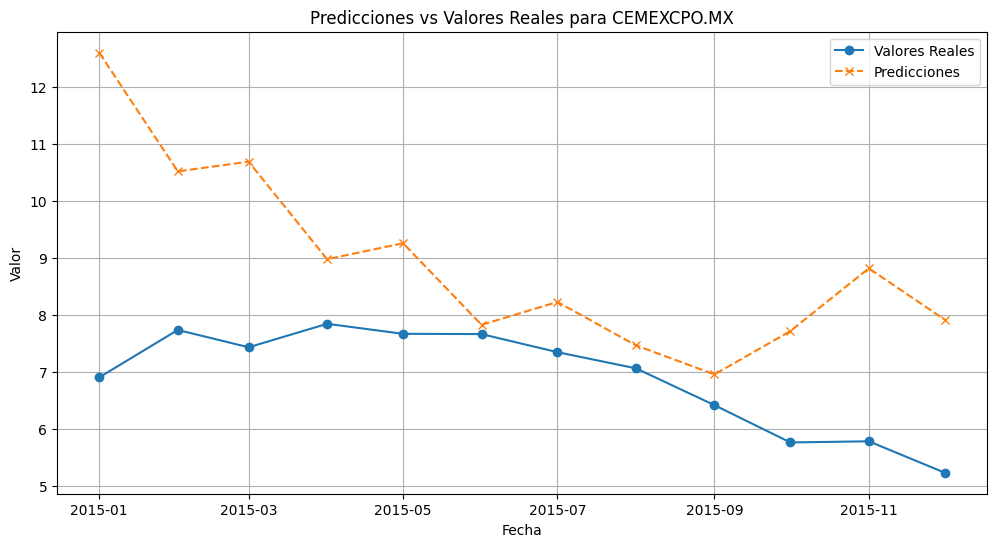

In [74]:
nombre_accion = 'CEMEXCPO.MX'  # Sustituir por el nombre de la acción deseada
graficar_predicciones_vs_reales_statsforecast(nombre_accion, pred, df_boxcox)

### **Modelo ARIMA**

In [75]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from statsforecast.arima import arima_string

from sklearn import metrics
import numpy as np

In [76]:
train = df[df.ds<'2022-12-31']
test = df[df.ds>='2023-01-01']

In [77]:
season_length = 12 # Monthly data
horizon = len(test['ds'].unique()) # number of predictions

models = [AutoARIMA(season_length=season_length)]

In [78]:
sf = StatsForecast(df=train,
                   models=models,
                   freq='MS',
                   n_jobs=-1)

c:\Users\esteb\.conda\envs\ITESO_1\lib\site-packages\statsforecast\core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


In [79]:
sf.fit()

c:\Users\esteb\.conda\envs\ITESO_1\lib\site-packages\statsforecast\core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


StatsForecast(models=[AutoARIMA])

In [80]:
test_hat = sf.forecast(fitted = True, h = horizon)
train_hat = sf.forecast_fitted_values()
test_hat.head()

c:\Users\esteb\.conda\envs\ITESO_1\lib\site-packages\statsforecast\core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
c:\Users\esteb\.conda\envs\ITESO_1\lib\site-packages\statsforecast\core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,AutoARIMA
unique_id,,
AC.MX,2023-01-01,147.468292
AC.MX,2023-02-01,147.468292
AC.MX,2023-03-01,147.468292
AC.MX,2023-04-01,147.468292
AC.MX,2023-05-01,147.468292


In [81]:
def model_evaluation(y_true, y_pred, stocks):
    errors_df = pd.DataFrame(columns=['MAPE'], index=stocks)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    for stock in stocks:
      y_true_stock = y_true[y_true['unique_id'] == stock]['y']
      y_pred_stock = y_pred[test_hat.index == stock]['AutoARIMA']
      print(f"MAPE score for {stock}: {mean_absolute_percentage_error(y_true_stock, y_pred_stock)}")
      errors_df.loc[stock, 'MAPE'] = mean_absolute_percentage_error(y_true_stock, y_pred_stock)

    return errors_df

In [82]:
errors_df = model_evaluation(test, test_hat, test['unique_id'].unique())

MAPE score for AC.MX: 7.900391372659275
MAPE score for ALFAA.MX: 6.6325188483774875
MAPE score for ALSEA.MX: 30.63567692170678
MAPE score for AMXB.MX: 8.891545500838511
MAPE score for ASURB.MX: 9.972192623456749
MAPE score for BBAJIOO.MX: 25.22312047685393
MAPE score for BIMBOA.MX: 14.46049360673415
MAPE score for BOLSAA.MX: 5.7932854917452445
MAPE score for CEMEXCPO.MX: 29.307509474676973
MAPE score for CHDRAUIB.MX: 18.269799112984305
MAPE score for CUERVO.MX: 11.547671232320807
MAPE score for FEMSAUBD.MX: 20.358494245877814
MAPE score for GAPB.MX: 13.300972723234047
MAPE score for GCARSOA1.MX: 30.235088400826832
MAPE score for GCC.MX: 16.884977365621264
MAPE score for GENTERA.MX: 7.597672216765226
MAPE score for GFINBURO.MX: 16.507722793409467
MAPE score for GFNORTEO.MX: 14.145310249480936
MAPE score for GMEXICOB.MX: 21.239211618725072
MAPE score for GRUMAB.MX: 10.20012066018786
MAPE score for KIMBERA.MX: 12.951515979114719
MAPE score for KOFUBL.MX: 9.710469023172989
MAPE score for L

In [83]:
import seaborn as sns

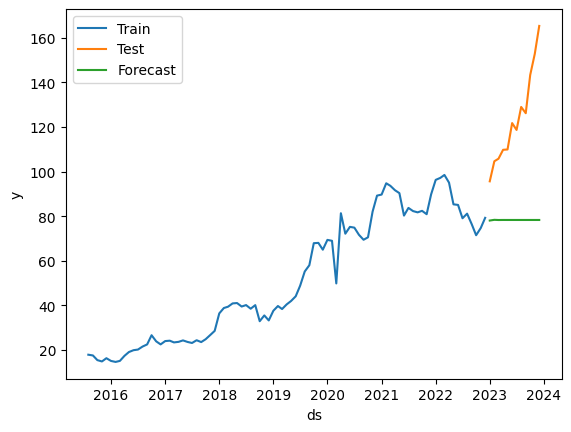

In [84]:
sns.lineplot(train[train['unique_id'] == 'Q.MX'], x="ds", y="y", label="Train")
sns.lineplot(test[test['unique_id'] == 'Q.MX'], x="ds", y="y", label="Test")
sns.lineplot(test_hat[test_hat.index == 'Q.MX'], x="ds", y="AutoARIMA", label="Forecast",)
plt.show()

In [85]:
arima_string(sf.fitted_[24,0].model_)

'ARIMA(0,1,0)                   '

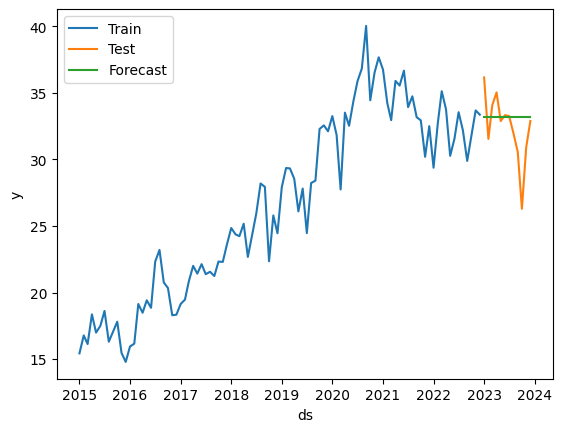

In [86]:
sns.lineplot(train[train['unique_id'] == 'BOLSAA.MX'], x="ds", y="y", label="Train")
sns.lineplot(test[test['unique_id'] == 'BOLSAA.MX'], x="ds", y="y", label="Test")
sns.lineplot(test_hat[test_hat.index == 'BOLSAA.MX'], x="ds", y="AutoARIMA", label="Forecast",)
plt.show()

In [87]:
arima_string(sf.fitted_[6,0].model_)

'ARIMA(2,2,1)                   '

### **Vector Autoregresivo**

In [88]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error

In [89]:
def preprocesar_datos(data, umbral_nulos=20):
    data_filtrada = data.loc[:, data.isnull().sum() <= umbral_nulos]
    
    data_imputada = data_filtrada.interpolate(method='linear').dropna()
    
    return data_imputada

In [90]:
data_preprocesada = preprocesar_datos(data_diff_cols)

In [91]:
def dividir_datos(data):
    train = data.loc[:'2022-12-31']
    test = data.loc['2023-01-01':]
    return train, test

In [92]:
train_data, test_data = dividir_datos(data_preprocesada)

In [93]:
model = VAR(train_data)
results = model.fit(ic='aic')

In [94]:
def calcular_mse_por_accion(results, train, test):
   
    forecast = results.forecast(train.values, steps=len(test))
    forecast_df = pd.DataFrame(forecast, index=test.index, columns=test.columns)
    
    mse_por_accion = {}
    for columna in test.columns:
        mse = mean_squared_error(test[columna], forecast_df[columna])
        mse_por_accion[columna] = mse
    
    return mse_por_accion, forecast_df

In [95]:
mse_resultados, forecast_df = calcular_mse_por_accion(results, train_data, test_data)

In [96]:
mse_df = pd.DataFrame.from_dict(mse_resultados, orient='index', columns=['VAR_MSE'])
mse_df.index.name = 'Acción'

In [97]:
print("Métricas de error cuadrático medio (MSE) por acción:")
mse_df

Métricas de error cuadrático medio (MSE) por acción:


,VAR_MSE
Acción,
AC.MX,2.056702e-10
ALFAA.MX,4.682897e-03
ALSEA.MX,4.456263e+02
AMXB.MX,4.984041e-04
ASURB.MX,2.117745e-03
BIMBOA.MX,7.841177e-10
BOLSAA.MX,5.624501e+01
CEMEXCPO.MX,2.876516e+00
CHDRAUIB.MX,3.452887e-07


In [98]:
def revertir_diferenciacion(predicciones, data_original, niveles_diferenciacion):
    
    predicciones_revertidas = predicciones.copy()
    for columna, nivel in niveles_diferenciacion.items():
        if columna not in data_original.columns:
            continue  
        
        if nivel == 0:
            continue  
        
        valores_base = data_original[columna].iloc[-nivel:]
        for _ in range(nivel):
            predicciones_revertidas[columna] = predicciones_revertidas[columna].cumsum() + valores_base.iloc[_]
    
    return predicciones_revertidas


In [99]:
def revertir_boxcox(predicciones, lambdas):

    predicciones_revertidas = predicciones.copy()
    for columna, lambda_val in lambdas.items():
        if columna not in predicciones.columns:
            continue 
        
        if lambda_val is None:
            continue  
        
        if lambda_val == 0:
            predicciones_revertidas[columna] = np.exp(predicciones_revertidas[columna])
        else:
            predicciones_revertidas[columna] = (predicciones_revertidas[columna] * lambda_val + 1) ** (1 / lambda_val)
    
    return predicciones_revertidas


In [100]:
predicciones_revertidas_dif = revertir_diferenciacion(forecast_df, train_data, niveles_diferenciacion)

In [101]:
predicciones_finales = revertir_boxcox(predicciones_revertidas_dif, lambdas)

In [102]:
print("Predicciones en la escala original:")
predicciones_finales

Predicciones en la escala original:


Ticker,AC.MX,ALFAA.MX,ALSEA.MX,AMXB.MX,ASURB.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CHDRAUIB.MX,FEMSAUBD.MX,...,MEGACPO.MX,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,Q.MX,RA.MX,TLEVISACPO.MX,VESTA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-01,1.000014,0.959003,NaN,0.999155,0.960338,1.000037,NaN,8.086977,0.997792,0.972776,...,-1.454149,0.981237,0.968327,1.006068,141.427029,1.197102,0.994364,0.340929,1.000577,0.775899
2023-02-01,1.000000,0.953520,NaN,1.003385,0.965527,1.000009,3.242763,8.075803,0.994728,0.940287,...,-0.952602,0.983976,0.953975,0.998307,139.569695,1.357179,0.934434,0.219749,1.000724,0.764811
2023-03-01,1.000001,0.936794,NaN,0.998845,0.966295,1.000019,3.368880,8.162527,0.992774,0.923260,...,-1.562316,0.982895,0.948841,0.999983,140.304641,1.364962,0.947236,0.142790,1.000815,0.761868
2023-04-01,1.000002,0.915655,NaN,0.994922,0.969163,1.000043,3.293973,8.000412,0.990229,0.916103,...,-1.592684,0.985509,0.939654,1.000805,139.711931,1.420195,0.922388,0.106911,1.000870,0.750159
2023-05-01,1.000011,0.933813,NaN,0.997561,0.975090,1.000054,4.609723,8.237819,0.987924,0.917976,...,-1.653258,0.989058,0.951825,1.004968,141.109779,1.559697,0.955165,0.103640,1.001243,0.794247
2023-06-01,1.000015,0.923300,NaN,0.997490,0.980804,1.000056,5.308080,8.341823,0.985393,0.912334,...,-2.285736,0.992964,0.951402,1.006576,141.939811,1.605145,0.974421,0.075566,1.001316,0.777861
2023-07-01,1.000017,0.906426,NaN,0.997469,0.984253,1.000064,5.664352,8.468745,0.983051,0.907645,...,-2.410560,0.994348,0.949432,1.008606,141.193598,1.657360,0.981335,0.059304,1.001506,0.795751
2023-08-01,1.000019,0.898078,NaN,0.998014,0.987602,1.000078,6.096357,8.603519,0.980658,0.907760,...,-2.612402,0.996411,0.949155,1.009884,141.560745,1.747816,0.994671,0.044076,1.001691,0.804659
2023-09-01,1.000023,0.892898,NaN,0.998928,0.991285,1.000085,6.678670,8.733886,0.978275,0.905986,...,-2.970474,0.998757,0.953315,1.011952,141.828734,1.838293,1.010281,0.031970,1.001859,0.814885


In [103]:
def graficar_predicciones_vs_reales(nombre_accion, predicciones, reales):
    """
    Grafica las predicciones frente a los valores reales para una acción específica.
    
    Args:
        nombre_accion (str): Nombre de la acción a graficar.
        predicciones (pd.DataFrame): DataFrame con las predicciones en la escala original.
        reales (pd.DataFrame): DataFrame con los valores reales en la escala original.
    """
    if nombre_accion not in predicciones.columns or nombre_accion not in reales.columns:
        print(f"La acción '{nombre_accion}' no se encuentra en los DataFrames proporcionados.")
        return
    
    plt.figure(figsize=(12, 6))
    plt.plot(reales.index, reales[nombre_accion], label='Valores Reales', marker='o')
    plt.plot(predicciones.index, predicciones[nombre_accion], label='Predicciones', linestyle='--', marker='x')
    
    plt.title(f"Predicciones vs Valores Reales para {nombre_accion}")
    plt.xlabel("Fecha")
    plt.ylabel("Valor")
    plt.legend()
    plt.grid(True)
    plt.show()

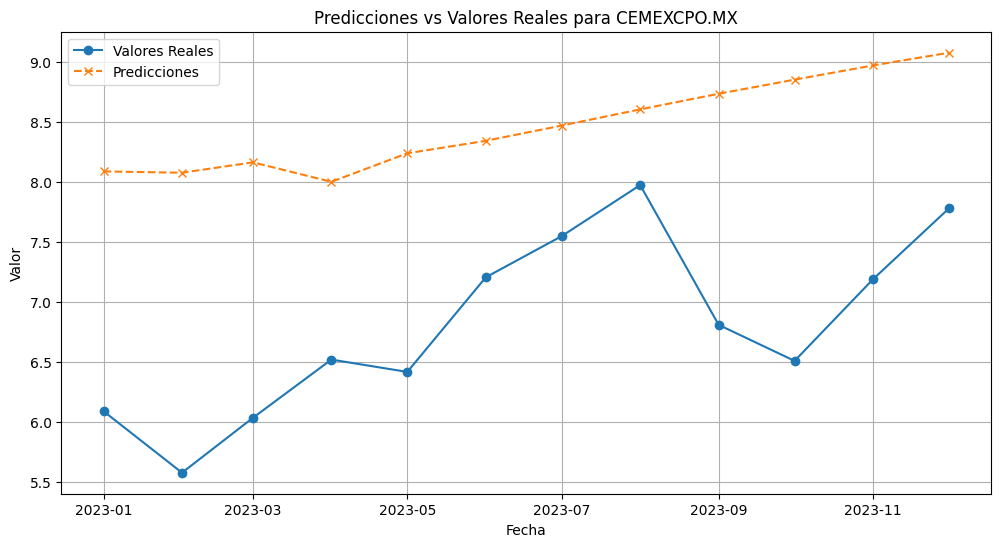

In [104]:
nombre_accion = 'CEMEXCPO.MX'  # Sustituir por el nombre de la acción deseada
graficar_predicciones_vs_reales(nombre_accion, predicciones_finales, test_data)

## **Validación de resultados y elección del modelo**

## **Pronosticos**

## **Conclusión**